In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
df=pd.read_csv("car_prices.csv")
df.head()
df["mileage"].min(),df["mileage"].max()

(5769, 199806)

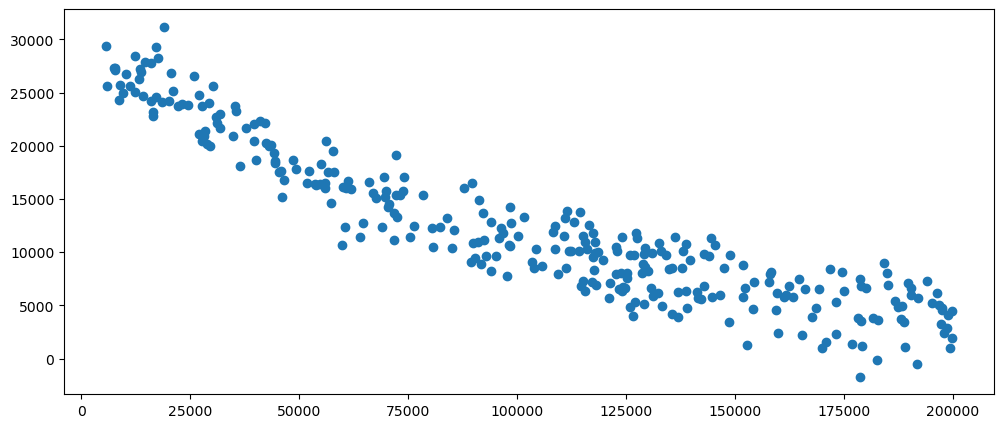

In [7]:
plt.figure(figsize=(12,5))
plt.scatter(df["mileage"],df["selling_price"])
plt.show()

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

In [13]:
X=df[["mileage"]]
y=df["selling_price"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [14]:
X_train.shape,X_test.shape

((240, 1), (60, 1))

In [27]:
model1=LinearRegression()
model1.fit(X_train,y_train)
# model.score(X_test,y_test)
y_pred=model1.predict(X_test)
r2_score(y_pred,y_test)

0.848256413128536

In [24]:
from sklearn.preprocessing import PolynomialFeatures

poly=PolynomialFeatures(degree=2)
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

In [32]:
X_train.head()
X_test.head()

,mileage
203,198075
266,196785
152,191892
9,92498
233,94045


In [30]:
X_train_poly[:5]

array([[1.00000000e+00, 1.11081000e+05, 1.23389886e+10],
       [1.00000000e+00, 1.29358000e+05, 1.67334922e+10],
       [1.00000000e+00, 5.98860000e+04, 3.58633300e+09],
       [1.00000000e+00, 1.45546000e+05, 2.11836381e+10],
       [1.00000000e+00, 1.51779000e+05, 2.30368648e+10]])

In [33]:
X_test_poly[:5]

array([[1.00000000e+00, 1.98075000e+05, 3.92337056e+10],
       [1.00000000e+00, 1.96785000e+05, 3.87243362e+10],
       [1.00000000e+00, 1.91892000e+05, 3.68225397e+10],
       [1.00000000e+00, 9.24980000e+04, 8.55588000e+09],
       [1.00000000e+00, 9.40450000e+04, 8.84446202e+09]])

In [34]:
model2=LinearRegression()
model2.fit(X_train_poly,y_train)

LinearRegression()

In [45]:
# model2.score(X_test_poly,y_test)
y_pred=model2.predict(X_test_poly)
r2_score(y_pred,y_test)

0.9052725066611751

In [47]:
mse=mean_squared_error(y_pred,y_test)
mse

4823730.8396795355

In [50]:
import numpy as np

x_range = np.linspace(X['mileage'].min(), X['mileage'].max(), 300).reshape(-1, 1)
x_range_poly = poly.transform(x_range)
y_range_pred = model2.predict(x_range_poly)

C:\Users\Chatla Manikanta\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [58]:
x_range[:5]

array([[5769.        ],
       [6417.95317726],
       [7066.90635452],
       [7715.85953177],
       [8364.81270903]])

In [59]:
x_range_poly[:5]

array([[1.00000000e+00, 5.76900000e+03, 3.32813610e+07],
       [1.00000000e+00, 6.41795318e+03, 4.11901230e+07],
       [1.00000000e+00, 7.06690635e+03, 4.99411654e+07],
       [1.00000000e+00, 7.71585953e+03, 5.95344883e+07],
       [1.00000000e+00, 8.36481271e+03, 6.99700917e+07]])

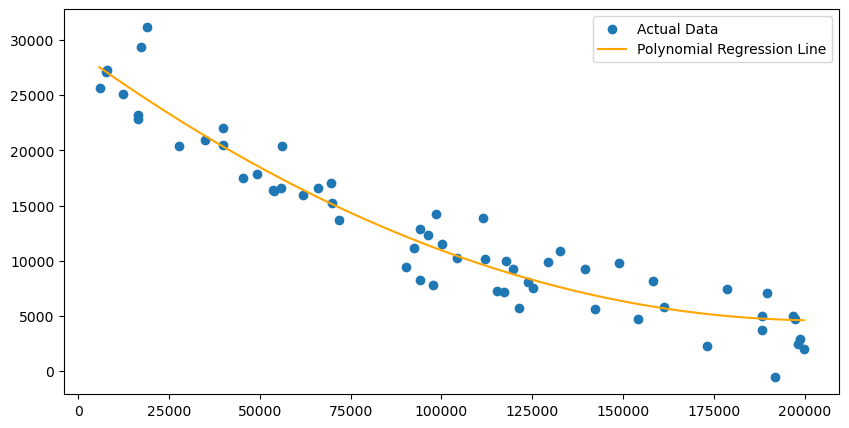

In [67]:
plt.figure(figsize=(10,5))
plt.scatter(X_test["mileage"],y_test,label="Actual Data")
plt.plot(x_range,y_range_pred,color="orange",label="Polynomial Regression Line")
plt.legend()
plt.show()